# DSC540
# Week 9 & 10 Exercises 
## Astrid Fuentes
## 21-Feb-2021

# Lesson 7 Activity 1: Top 100 ebooks' name extraction from Gutenberg.org
# Page 294 (Activity 9)
## What is Project Gutenberg? - 
Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the **oldest digital library.** This longest-established ebook project releases books that entered the public domain, and can be freely read or downloaded in various electronic formats.

## What is this activity all about?
* **This activity aims to scrape the url of the Project Gutenberg's Top 100 ebooks (yesterday's ranking) for identifying the ebook links. **
* **It uses BeautifulSoup4 for parsing the HTML and regular expression code for identifying the Top 100 ebook file numbers.**
* **You can use those book ID numbers to download the book into your local drive if you want**

### 1. Import the necessary libraries, including regex and beautifulsoup.

In [1]:
# Import libraries urllib, requests, BeautifulSoup, ssl, and re
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### 2. Check the SSL certificate.

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### 3. Read the HTML from the URL.

In [3]:
# Read the HTML from the URL and pass on save the request in response variable
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

### 4. Write a small function to check the status of the web request.

In [4]:
# Define function status_check() to check the status of the web### 3. Read the HTML from the URL request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [5]:
# Apply the status_check function on our request. Succesful status is expected.
status_check(response)

Success!


1

### 5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [6]:
# Decode the contents of the web response and save in contents variable
contents = response.content.decode(response.encoding)

In [7]:
# Parse the decoded contents through BeautifulSoup and save in soup variable
soup = BeautifulSoup(contents, 'html.parser')

### 6. Find all the href tags and store them in the list of links. Check what the list looks like - print the first 30 elements.

In [8]:
# Create empty list lst_links to hold the http links from the main page
lst_links=[]

In [9]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [10]:
# Print the first 30 elements of the list of links
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### 7. Use regular expression to find the numeric digits in these links. These are the file number for the Top 100 eBooks.
### and
### 8. Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.

In [11]:
# Create an empty list booknum to hold the file numbers
booknum=[]

In [12]:
# Number 19 to 118 in the original list of links have the Top 100 ebooks' number.
# Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [13]:
# Print the file numbers
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 84, 11, 1661, 2701, 98, 64596, 1080, 5200, 174, 1260, 1952, 844, 76, 64595, 25344, 57775, 46, 1497, 64317, 219, 345, 43, 2542, 1232, 160, 4300, 408, 6133, 74, 16, 64592, 2591, 2600, 1400, 16328, 1184, 55, 514, 2852, 3207, 205, 996, 42108, 135, 158, 58585, 36, 1250, 120, 768, 1998, 23, 5740, 45, 6130, 43453, 2814, 2554, 244, 64594, 19942, 829, 25929, 215, 203, 3600, 766, 1001, 1727, 902, 863, 64599, 30254, 32415, 27559, 7370, 3825, 105, 140, 730, 209, 113, 35, 20203, 972]


### 9. What does the `soup` object's text look like? Use `.text()` method and print only first 2000 characters (i.e. do not print the whole thing, it is long).

You will notice lot of empty spaces/blanks here and there. Ignore them. They are part of HTML page markup and its whimsical nature!

In [14]:
# Print first 2000 characters of soup
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-02-20178820
last 7 days1394510
last 30 days5788321



Top 100 EBooks yesterd

### 10. Search in the extracted text (using regular expression) from the `soup` object to find the names of top 100 Ebooks (Yesterday's rank)

In [15]:
# Create an empty list of Ebook names
lst_titles_temp=[]

### 11. Create a starting index. It should point at the text _"Top 100 Ebooks yesterday"_. Hint: Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.

In [16]:
# start_idx using splitlines()
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

### 12. Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: `splitlines()` method

In [17]:
# For loop to insert the start_idx index in the list of books
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

### 13. Use regular expression to extract only text from the name strings and append to an empty list. Hint: Use `match` and `span` to find indices and use them

In [18]:
# Create empty list and use For look to extract the text of the name strings and fill in the list.
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [19]:
# Print the list that contains the titles of the to 100 eBooks from Gutenberg.
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Pride and Prejudice by Jane Austen 
Frankenstein
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
A Tale of Two Cities by Charles Dickens 
The Star Beast by Damon Knight 
A Modest Proposal by Jonathan Swift 
Metamorphosis by Franz Kafka 
The Picture of Dorian Gray by Oscar Wilde 
Jane Eyre
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Importance of Being Earnest
Adventures of Huckleberry Finn by Mark Twain 
Animat by Basil Wells 
The Scarlet Letter by Nathaniel Hawthorne 
Le jardin des supplices by Octave Mirbeau 
A Christmas Carol in Prose
The Republic by Plato 
The Great Gatsby by F
Heart of Darkness by Joseph Conrad 
Dracula by Bram Stoker 
The Strange Case of Dr
Et dukkehjem
Il Principe
The Awakening
Ulysses by James Joyce 
The Souls of Black Folk by W
Ars
The Adventures of Tom Sawyer
Peter Pan by J
Harper
Grimms
War and Peace by graf Leo Tolstoy 
Great Expectations by Charles Dickens 
Beowulf
The Count of Monte Cristo
The

# Lesson 7: Advanced web scraping and data gathering
## Activity 2: Build your own movie database by reading from an API
# Page 294 (Activity 10)
### This notebook does the following
* Retrieves and prints basic data about a movie (title entered by user) from the web (OMDB database)
* If a poster of the movie could be found, it downloads the file and saves at a user-specified location

### 1. Import urllib.requests, urllib.parse, urllib.error, and json.

In [21]:
# import libraries
import urllib.request, urllib.parse, urllib.error
import json

### 2. Load the secret API key (you have to get one from OMDB website and use that, 1000 daily limit) from a JSON file, stored in the same folder into a variable
Hint: Use **`json.loads()`**

### 3. Obtain a key and store it in JSON as APIkeys.json

In [56]:
# I obtained my API key from omdbapi.com and saved it a file named APIkeys.jason
# The I change my working directory to where my APIkeys.json file is stored

In [55]:
cd '/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/Lesson07/Activity10'

/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/Lesson07/Activity10


### 4. Open the APIkeys.json file

In [57]:
# Open the file and load the API key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

### 5. Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable serviceurl

In [60]:
# my sample URL: http://www.omdbapi.com/?t='Title'&apikey=b742e81f
serviceurl = 'http://www.omdbapi.com/?'

### 6. Create a variable `apikey` with the last portion of the URL ("&apikey=secretapikey"), where `secretapikey` is your own API key (an actual code)

In [59]:
#My key=b742e81f saved in variable omdbapi
apikey = '&apikey='+omdbapi

### 7. Write a utility function `print_json` to print nicely the movie data from a JSON file (which we will get from the portal)
Here are the keys of a JSON file,

'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

In [61]:
# Define function to obtain information from JSON from the portal. API documentation can help set this up.
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

### 8.  Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder

* Use `os` module
* The poster data is stored in the JSON key 'Poster'
* You may want to split the name of the Poster file and extract the file extension only. Let's say the extension is ***'jpg'***.
* Then later join this extension to the movie name and create a filename like ***movie.jpg***
* Use the Python command `open` to open a file and write the poster data. Close the file after done.
* This function may not return anything. It just saves the poster data as an image file.

In [62]:
# Define save_poster function to obtain and save the poster for a movie.
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

### 9. Write a utility function `search_movie` to search a movie by its name, print the downloaded JSON data (use the `print_json` function for this) and save the movie poster in the local folder (use `save_poster` function for this)

* Use `try-except` loop for this i.e. try to connect to the web portal, if successful proceed but if not (i.e. exception raised) then just print an error message
* Here use the previously created variables `serviceurl` and `apikey`
* You have to pass on a dictionary with a key `t` and the movie name as the corresponding value to `urllib.parse.urlencode()` function and then add the `serviceurl` and `apikey` to the output of the function to construct the full URL
* This URL will be used for accessing the data
* The JSON data has a key called `Response`. If it is `True`, that means the read was successful. Check this before processing the data. If not successful, then print the JSON key `Error`, which will contain the appropriate error message returned by the movie database.

In [63]:
# Define search_movie function to search for a movie by its name and print its information
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

### 10. Test `search_movie` function by entering *Titanic*

In [67]:
search_movie("'Titanic'")

Retrieving the data of "'Titanic'" now... 
http://www.omdbapi.com/?t=%27Titanic%27&apikey=b742e81f
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,048,704
imdbID: tt0120338
--------------------------------------------------


### 11. Test `search_movie` function by entering "*Random_error*" (obviously this will not be found and you should be able to check whether your error catching code is working properly)

In [44]:
search_movie("'Random_error'")

Retrieving the data of "'Random_error'" now... 
http://www.omdbapi.com/?t=%27Random_error%27&apikey=b742e81f
Error encountered:  Movie not found!


### Look for a folder called 'Posters' in the same directory you are working in. It should contain a file called 'Titanic.jpg'. Open and see if the poster came alright!

In [84]:
# The poster has been downloaded and saved as expected

## Activity 3. Connect to the Twitter API and do a simple data pull

### a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

### b. Sign in to apps.twitter.com

### c. Click “Create New App”

### d. Give your app a name and description

### e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

### f. Create an access token

### g. You should receive a consumer key and a token

### h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

#### i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)

#### ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)


In [4]:
pip install python twitter

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
Note: you may need to restart the kernel to use updated packages.


In [5]:
 import twitter

ModuleNotFoundError: No module named 'tweepy'

In [ ]:

api = twitter.Api(consumer_key='your_consumer_key',
  consumer_secret='your_consumer_secret',
    access_token_key='your_access_token_key',
    access_token_secret='your_access_token_secret')

In [ ]:
tweets = twitter.Cursor(api.search, q="#Bellevue University", lang = "en", since = "2020-01-01"). items(5)
tweets

## Activity 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

In [89]:
cd '/Users/astrid/Documents/GitHub/ThinkStats2/code'

/Users/astrid/Documents/GitHub/ThinkStats2/code


In [92]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import brfss

import thinkstats2
import thinkplot

In [99]:
df = brfss.ReadBrfss(nrows=None)

The following function selects a random subset of a `DataFrame`.

In [100]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

I'll extract the height in cm and the weight in kg of the respondents in the sample.

In [104]:
sample = SampleRows(df, 50)
heights, weights = sample.htm3, sample.wtkg2

### a. Line

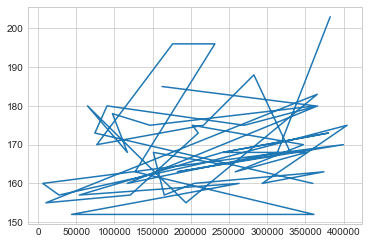

In [105]:
plt.plot(heights, linestyle='solid')

### b. Scatter

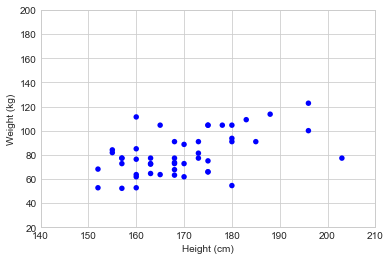

In [106]:
thinkplot.Scatter(heights, weights, alpha=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

### d. Histogram

(array([ 8., 12., 13., 10.,  3.,  0.,  3.]),
 array([152.        , 159.28571429, 166.57142857, 173.85714286,
        181.14285714, 188.42857143, 195.71428571, 203.        ]),
 <BarContainer object of 7 artists>)

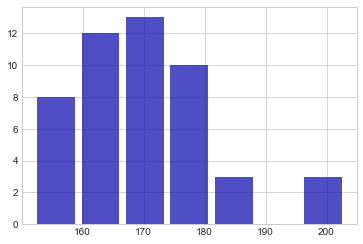

In [110]:
plt.hist(x=heights, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)